### This notebook reads in a 3D point cloud (xyz), performs a 3D delaunay triangulation to create a bounding surface, and then uniformly generates points over the surface that can be outputed to a file. 

In [1]:
#install required packages -- pyvista and open3d
!pip install pyvista
!pip install open3d


/Users/catherinezucker/miniconda3/envs/glue/lib/python3.9/site-packages/pyvista/utilities/helpers.py:476: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(
/Users/catherinezucker/miniconda3/envs/glue/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


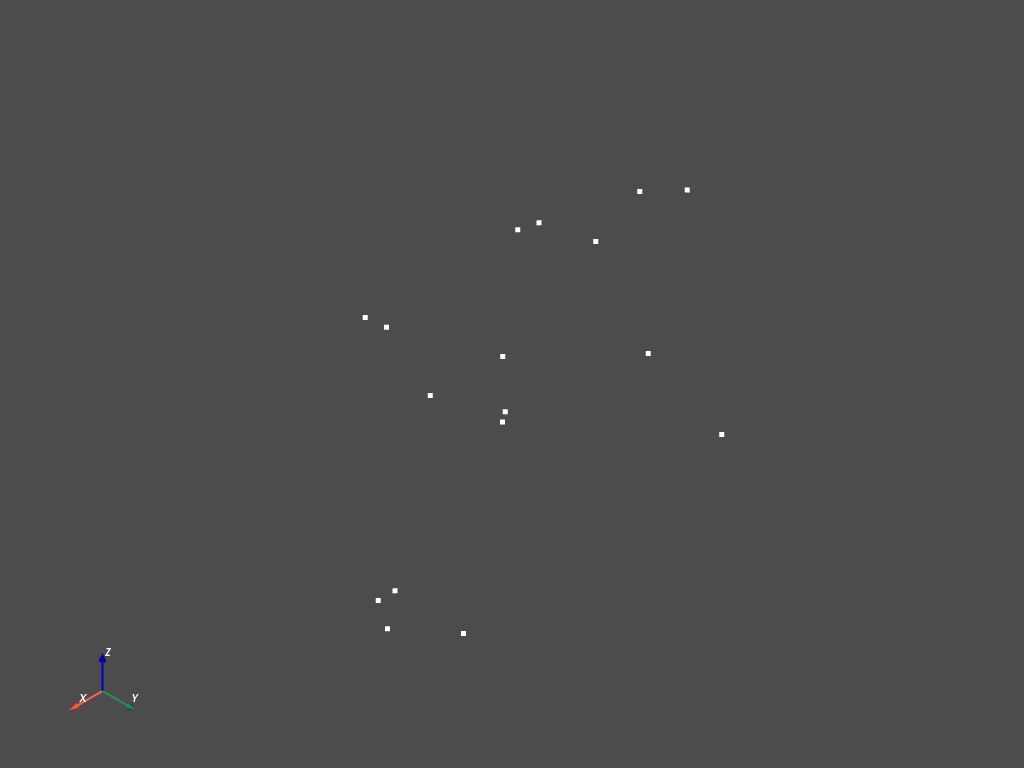

In [2]:
import pyvista as pv
import numpy as np
from astropy.table import Table

#load in xyz coordinates
t = Table.read('points3d.csv',format='csv')
points3d = np.vstack((t['X'],t['Y'],t['Z'])).T

# set up the pyvista point cloud structure
cloud = pv.PolyData(points3d) 

#plot of points inside each mask, separated by some distance
cloud.plot()

Computing 3D Triangulation: 100%|██████████████████████████████████[00:00<00:00]


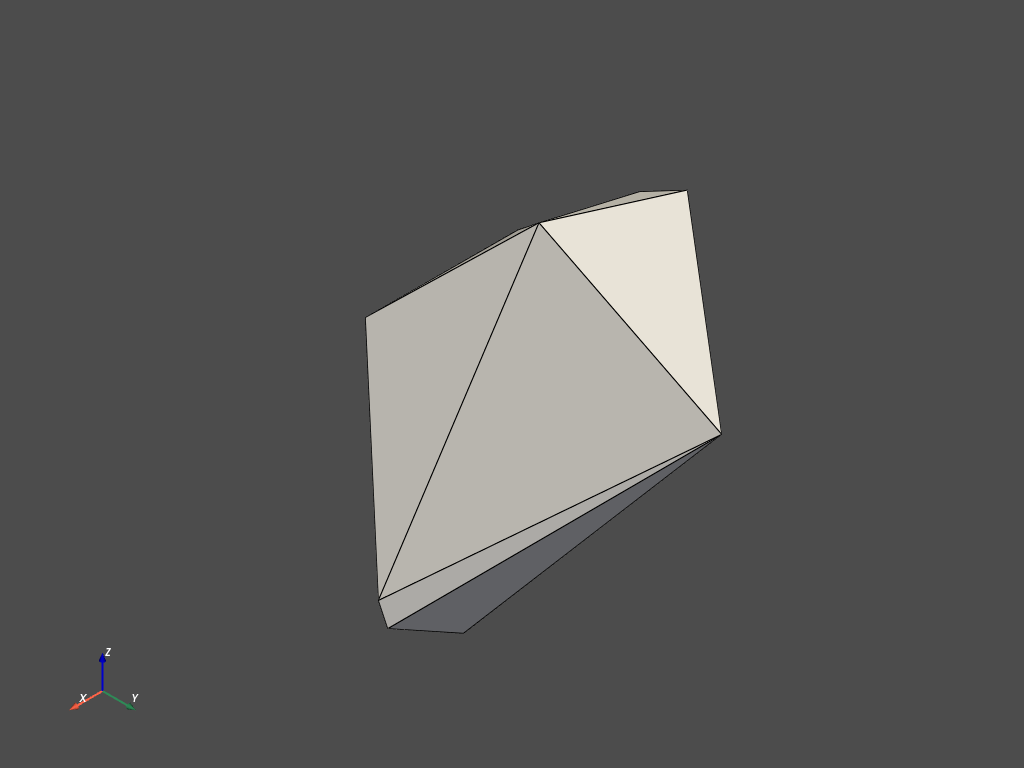

In [3]:
#set alpha parameter for creating the concave hull
alpha=300

#run delaunay 3D triangulation
mesh = cloud.delaunay_3d(alpha=alpha,progress_bar=True)

#convert unstructured grid to polydata and create a surface
surface=mesh.extract_surface()

surface.plot(show_edges=True)

#save the surface to a file so we can generate a uniform set of points over the surface using open3d software
surface.save("mesh.ply")

In [4]:
#read in mesh to open3d

import open3d as o3d
mesh_new = o3d.io.read_triangle_mesh("mesh.ply")

In [5]:
#use open3d to uniform generate points over a surface. 
#To increase the density of points on the surface, set the "number of points" argument
pcd = mesh_new.sample_points_poisson_disk(number_of_points=3000)
o3d.visualization.draw_geometries([pcd])

In [6]:
#extract the coordinates of the points on the bounding surface
bounding_surface_points = np.array(pcd.points)

In [7]:
#generate a table so points on bounding surface can be output to file

t = Table()
t['x'] = bounding_surface_points[:,0]
t['y'] = bounding_surface_points[:,1]
t['z'] = bounding_surface_points[:,2]

t.write("bounding_surface_points.csv")